# パターン情報学　
##### 03-210245 峰岸剛基

ここではipynbのすぐに可視化できるというメリット活かし、データを可視化してiris.csvとauto-mpg.csvの分析を行う

まず動かすためにiris.csvとauto-mpg.csvをアップロードしてください。

## モジュールインポート

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA #主成分分析器
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns

# iris dataについて

In [ ]:
df1 = pd.read_csv('iris.csv')
df_data = df.loc[:,'sepal_length':'petal_width']
data1 = df_data.iloc[:].values
color_list = []
for i in list(df1.iloc[:,4]):
  if i == 'setosa':
    color_list.append(0)
  elif i== "versicolor":
    color_list.append(1)
  elif i=='virginica':
    color_list.append(2)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### sepal_length vs sepal_width

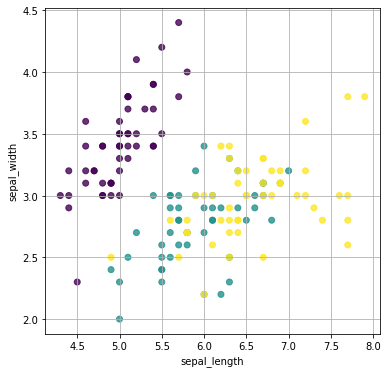

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df1.loc[:,"sepal_length"].values, df1.loc[:,"sepal_width"].values, alpha=0.8,c=color_list)
plt.grid()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

### petal_length vs petal_width

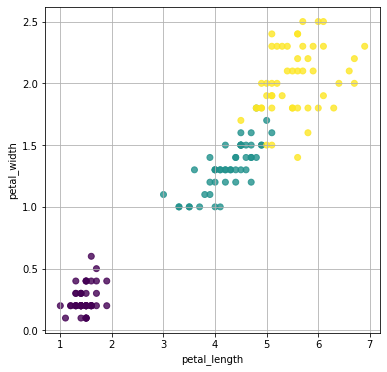

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df1.loc[:,"petal_length"].values, df1.loc[:,"petal_width"].values, alpha=0.8,c=color_list)
plt.grid()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

### sklearnで主成分分析を行いデータを可視化してみる

In [ ]:
pca = PCA(2)
pca.fit(data1)
# データを主成分空間に写像
feature = pca.transform(data1)
# 主成分得点
pd.DataFrame(feature)

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


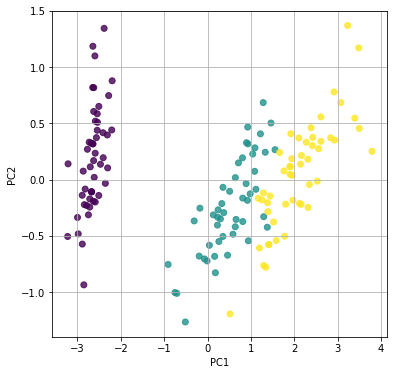

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8,c=color_list)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

petal_lengthとpetal_wodthが一番わかりやすい。

# auto-mpgについて

まずweightとhorsepowerについて可視化してみる

In [ ]:
df2 = pd.read_csv('auto-mpg.csv')
x1 = df2['weight'].values
x2 = df2['horsepower'].values
y = df2['mpg'].values

for i,d in enumerate(x2):
  if d == '?':
    x2[i] = 0
x2 = list(map(int,x2))
fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

NameError: ignored

線形性はありそう。

### 他の特徴量について
相関係数についてheatmapを作成してみる。

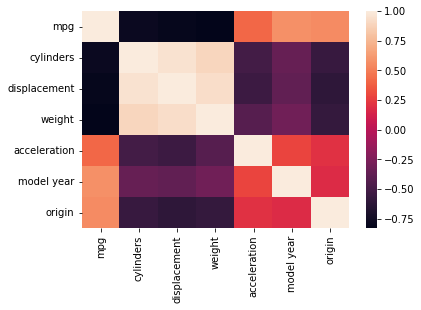

In [ ]:
sns.heatmap(df2.corr())

相関が強いのは
[cylinders,displacement,weight]
あたりであろうか。
(horsepowerは欠損値があるため表示されない)